# 1. Sequential Model

In [32]:
import numpy as np

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
import tensorflow as tf

2023-04-02 21:52:12.105110: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [6]:
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train, X_valid, X_test = X_train/255., X_valid / 255., X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

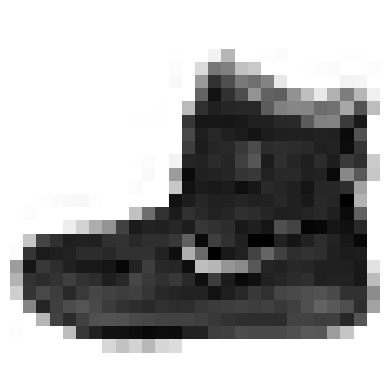

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

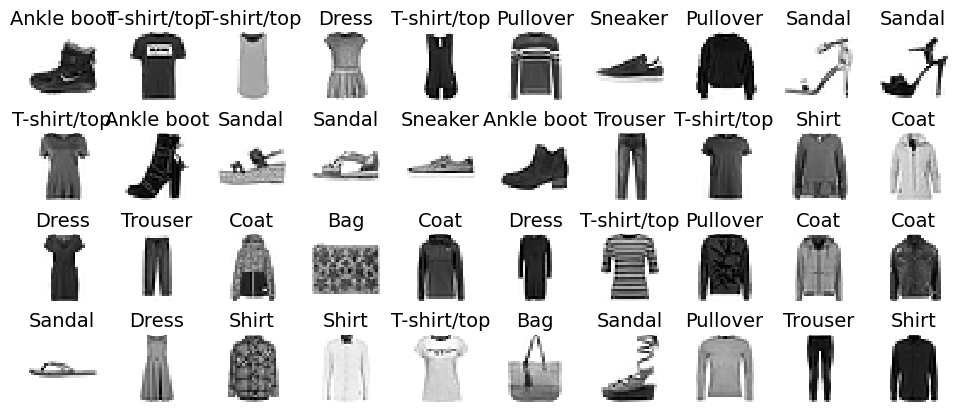

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [14]:
tf.random.set_seed(42)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


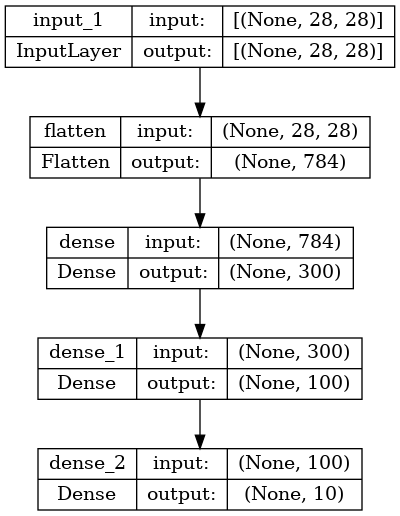

In [22]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


In [23]:
model.layers

In [24]:
model.get_layer('dense')

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05811237, -0.03617573, -0.0479249 , ...,  0.04745665,
         0.04777968, -0.05002261],
       [ 0.06868601, -0.06802189, -0.05546437, ...,  0.05313699,
        -0.00665512,  0.06486858],
       [ 0.02379281, -0.05440095,  0.06707022, ...,  0.01402779,
         0.03567923, -0.00410476],
       ...,
       [-0.07419655,  0.04077005, -0.07093201, ..., -0.01993879,
         0.06000617, -0.03337303],
       [ 0.00449575, -0.01412632,  0.03001878, ..., -0.01887682,
        -0.00697608, -0.01257981],
       [ 0.03271727, -0.03789989, -0.03130848, ...,  0.02460963,
         0.03845821,  0.05470747]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases.shape

(300,)

In [29]:
#compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = "accuracy")

In [30]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7135 - accuracy: 0.7680 - val_loss: 0.5439 - val_accuracy: 0.8148
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4867 - accuracy: 0.8326 - val_loss: 0.4578 - val_accuracy: 0.8290
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4399 - accuracy: 0.8477 - val_loss: 0.4181 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4120 - accuracy: 0.8573 - val_loss: 0.4057 - val_accuracy: 0.8540
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3925 - accuracy: 0.8622 - val_loss: 0.3925 - val_accuracy: 0.8544
Epoch 6/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3761 - accuracy: 0.8677 - val_loss: 0.3905 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3617 - accuracy: 0.8724 - val_loss: 0.3669 - val_a

In [31]:
import pandas as pd

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

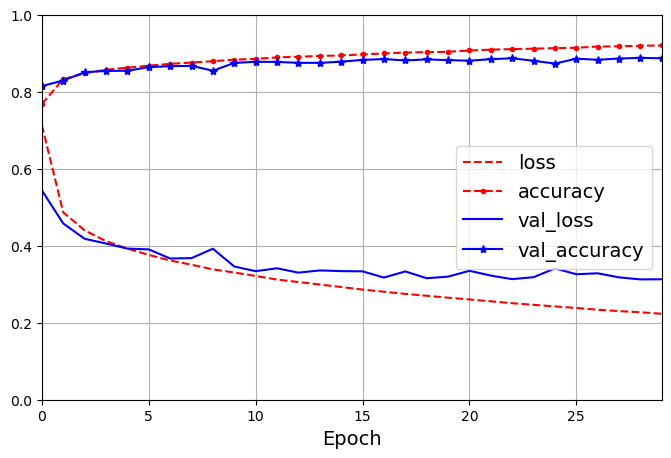

In [33]:
pd.DataFrame(history.history).plot(
figsize = (8,5), xlim = [0,29], ylim = [0,1], grid = True, xlabel= "Epoch",
style = ["r--", "r--.", "b-", "b-*"])
plt.show() #notice validation loss is lower than training loss at the beginning, why?

In [34]:
#evaluation

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8853


[0.33229508996009827, 0.8852999806404114]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
import numpy as np
y_pred = y_proba.argmax(axis =1 )
y_pred

array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

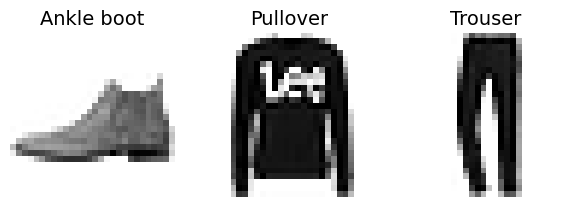

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP using the Sequential API/

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
housing = fetch_california_housing()

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42 )
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [7]:
tf.random.set_seed(42)

In [46]:
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8359 - root_mean_squared_error: 0.9143 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6720
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3841 - root_mean_squared_error: 0.6198 - val_loss: 1.9802 - val_root_mean_squared_error: 1.4072
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3742 - root_mean_squared_error: 0.6117 - val_loss: 0.5816 - val_root_mean_squared_error: 0.7626
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3402 - root_mean_squared_error: 0.5833 - val_loss: 0.4278 - val_root_mean_squared_error: 0.6540
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3308 - root_mean_squared_error: 0.5752 - val_loss: 0.5967 - val_root_mean_squared_error: 0.7724
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3237 - root_mean_squared_error: 0.5690 - val_loss: 2.1530 - val_

## Deep and wide model using functional API

In [42]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = "relu" )
hidden_layer2 = tf.keras.layers.Dense(30, activation = "relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer =tf.keras.layers.Dense(1)

In [43]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs = [output])

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 17s 10ms/step - loss: 8.8578 - root_mean_squared_error: 2.9762 - val_loss: 8.4743 - val_root_mean_squared_error: 2.9112
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 8.3168 - root_mean_squared_error: 2.8839 - val_loss: 8.4004 - val_root_mean_squared_error: 2.8985
Epoch 3/20
1719/1719 [==============================] - 11s 6ms/step - loss: 8.2764 - root_mean_squared_error: 2.8768 - val_loss: 8.4304 - val_root_mean_squared_error: 2.9037
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2715 - root_mean_squared_error: 2.8760 - val_loss: 8.4188 - val_root_mean_squared_error: 2.9017
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 8.2604 - root_mean_squared_error: 2.8741 - val_loss: 8.3749 - val_root_mean_squared_error: 2.8941
Epoch 6/20
1719/1719 [==============================] - 15s 9ms/step - loss: 8.2617 - root_mean_squared_error: 2.8743 - val_

## deep and wide inputs

In [8]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

2023-04-02 21:53:34.174812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 21:53:34.182772: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1631 - root_mean_squared_error: 1.0785 - val_loss: 0.5499 - val_root_mean_squared_error: 0.7416
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4755 - root_mean_squared_error: 0.6895 - val_loss: 0.4616 - val_root_mean_squared_error: 0.6794
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4220 - root_mean_squared_error: 0.6496 - val_loss: 0.5603 - val_root_mean_squared_error: 0.7485
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4072 - root_mean_squared_error: 0.6382 - val_loss: 0.7157 - val_root_mean_squared_error: 0.8460
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3918 - root_mean_squared_error: 0.6259 - val_loss: 0.3655 - val_root_mean_squared_error: 0.6045
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3842 - root_mean_squared_error: 0.6198 - val_loss: 0.7179 - val_

### multi-input and auxiliary output

In [10]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [11]:
#each out requires its own loss (keras assumes same for every output if unspecified) and weights
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [12]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.5142 - dense_5_loss: 1.4425 - dense_6_loss: 2.1591 - dense_5_root_mean_squared_error: 1.2010 - dense_6_root_mean_squared_error: 1.4694 - val_loss: 2.2704 - val_dense_5_loss: 2.2698 - val_dense_6_loss: 2.2756 - val_dense_5_root_mean_squared_error: 1.5066 - val_dense_6_root_mean_squared_error: 1.5085
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5573 - dense_5_loss: 0.5351 - dense_6_loss: 0.7568 - dense_5_root_mean_squared_error: 0.7315 - dense_6_root_mean_squared_error: 0.8699 - val_loss: 1.0453 - val_dense_5_loss: 1.0339 - val_dense_6_loss: 1.1475 - val_dense_5_root_mean_squared_error: 1.0168 - val_dense_6_root_mean_squared_error: 1.0712
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4585 - dense_5_loss: 0.4452 - dense_6_loss: 0.5778 - dense_5_root_mean_squared_error: 0.6672 - dense_6_root_mean_squared_error: 0.7601 - val_loss: 0.5749 - val_dense_5_loss

In [13]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 2ms/step - loss: 0.3330 - dense_5_loss: 0.3270 - dense_6_loss: 0.3875 - dense_5_root_mean_squared_error: 0.5718 - dense_6_root_mean_squared_error: 0.6225


In [57]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 51ms/step


# Subclassing API for dynamic models

In [58]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


In [59]:
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 1.5822 - output_1_loss: 1.5776 - output_2_loss: 1.6240 - output_1_root_mean_squared_error: 1.2560 - output_2_root_mean_squared_error: 1.2744 - val_loss: 0.9558 - val_output_1_loss: 0.9151 - val_output_2_loss: 1.3217 - val_output_1_root_mean_squared_error: 0.9566 - val_output_2_root_mean_squared_error: 1.1496
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6423 - output_1_loss: 0.6408 - output_2_loss: 0.6557 - output_1_root_mean_squared_error: 0.8005 - output_2_root_mean_squared_error: 0.8098 - val_loss: 1.1890 - val_output_1_loss: 1.2412 - val_output_2_loss: 0.7197 - val_output_1_root_mean_squared_error: 1.1141 - val_output_2_root_mean_squared_error: 0.8484
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5383 - output_1_loss: 0.5346 - output_2_loss: 0.5711 - output_1_root_mean_squared_error: 0.7312 - output_2_root_mean_squared_error: 0.7557 - val_loss: 0.550

In [62]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


In [64]:
from pathlib import Path

In [67]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [66]:
model.save_weights("my_weights")

In [14]:
model = tf.keras.models.load_model("my_keras_model")

In [15]:
model.load_weights("my_weights")

In [16]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 73ms/step


In [18]:
y_pred_aux

array([[0.66030365],
       [1.3941567 ],
       [3.073722  ]], dtype=float32)

### callbacks

In [19]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3618 - output_1_loss: 0.3528 - output_2_loss: 0.4425 - output_1_root_mean_squared_error: 0.5940 - output_2_root_mean_squared_error: 0.6652 - val_loss: 0.4700 - val_output_1_loss: 0.4742 - val_output_2_loss: 0.4317 - val_output_1_root_mean_squared_error: 0.6886 - val_output_2_root_mean_squared_error: 0.6571
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3587 - output_1_loss: 0.3505 - output_2_loss: 0.4330 - output_1_root_mean_squared_error: 0.5920 - output_2_root_mean_squared_error: 0.6580 - val_loss: 1.0607 - val_output_1_loss: 1.0685 - val_output_2_loss: 0.9905 - val_output_1_root_mean_squared_error: 1.0337 - val_output_2_root_mean_squared_error: 0.9953
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3553 - output_1_loss: 0.3470 - output_2_loss: 0.4297 - output_1_root_mean_squared_error: 0.5891 - output_2_root_mean_squared_error: 0.6555 - val_loss: 0.437

In [20]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3320 - output_1_loss: 0.3255 - output_2_loss: 0.3902 - output_1_root_mean_squared_error: 0.5705 - output_2_root_mean_squared_error: 0.6247 - val_loss: 0.5595 - val_output_1_loss: 0.5544 - val_output_2_loss: 0.6057 - val_output_1_root_mean_squared_error: 0.7446 - val_output_2_root_mean_squared_error: 0.7782
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3329 - output_1_loss: 0.3266 - output_2_loss: 0.3899 - output_1_root_mean_squared_error: 0.5715 - output_2_root_mean_squared_error: 0.6245 - val_loss: 1.0033 - val_output_1_loss: 1.0038 - val_output_2_loss: 0.9991 - val_output_1_root_mean_squared_error: 1.0019 - val_output_2_root_mean_squared_error: 0.9995
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3294 - output_1_loss: 0.3233 - output_2_loss: 0.3849 - output_1_root_mean_squared_error: 0.5686 - output_2_root_mean_squared_error: 0.6204 - val_loss: 0.

## Tensorboard

In [23]:
import shutil

In [24]:
shutil.rmtree("my_logs", ignore_errors=True)

In [25]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [26]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [27]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2023-04-02 22:11:10.866755: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-02 22:11:10.866785: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-04-02 22:11:10.867751: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


158/363 [============>.................] - ETA: 0s - loss: 3.7541 - root_mean_squared_error: 1.9376

2023-04-02 22:11:11.434241: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-02 22:11:11.434277: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


269/363 [=====================>........] - ETA: 0s - loss: 2.7204 - root_mean_squared_error: 1.6494

2023-04-02 22:11:11.679997: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-04-02 22:11:11.701477: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-02 22:11:11.702938: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: my_logs/run_2023_04_02_22_10_32/plugins/profile/2023_04_02_22_11_11/analytics.xplane.pb


363/363 [==============================] - 2s 4ms/step - loss: 2.2700 - root_mean_squared_error: 1.5067 - val_loss: 0.9927 - val_root_mean_squared_error: 0.9963
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7875 - root_mean_squared_error: 0.8874 - val_loss: 0.7460 - val_root_mean_squared_error: 0.8637
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6527 - root_mean_squared_error: 0.8079 - val_loss: 0.6039 - val_root_mean_squared_error: 0.7771
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5963 - root_mean_squared_error: 0.7722 - val_loss: 0.5608 - val_root_mean_squared_error: 0.7489
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5600 - root_mean_squared_error: 0.7483 - val_loss: 0.5140 - val_root_mean_squared_error: 0.7169
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5308 - root_mean_squared_error: 0.7285 - val_loss: 0.4912 - val_root_mean_s

In [28]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2023_04_02_22_10_32
    events.out.tfevents.1680473471.analytics.profile-empty
    plugins
      profile
        2023_04_02_22_11_11
          analytics.xplane.pb
    train
      events.out.tfevents.1680473470.analytics.573.0.v2
    validation
      events.out.tfevents.1680473472.analytics.573.1.v2


In [30]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1946), started 0:10:36 ago. (Use '!kill 1946' to kill it.)

In [33]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [37]:
import keras_tuner as kt

In [40]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [41]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [42]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [43]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 02m 23s]
val_accuracy: 0.8425999879837036

Best val_accuracy So Far: 0.8640000224113464
Total elapsed time: 00h 10m 54s
INFO:tensorflow:Oracle triggered exit


In [44]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [45]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8640000224113464


In [46]:
best_trial.metrics.get_last_value("val_accuracy")

0.8640000224113464

In [47]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3270 - accuracy: 0.8796
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3160 - accuracy: 0.8838
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3068 - accuracy: 0.8878
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3004 - accuracy: 0.8897
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2937 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2869 - accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2802 - accuracy: 0.8966
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2741 - accuracy: 0.8982
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2700 - accuracy: 0.9005
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 

In [48]:
#alternatively 

class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [49]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [50]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 01m 30s]
val_accuracy: 0.8461999893188477

Best val_accuracy So Far: 0.8781999945640564
Total elapsed time: 00h 45m 57s
INFO:tensorflow:Oracle triggered exit


In [51]:
%tensorboard --logdir {root_logdir}

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-04-03 01:05:53.358502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.